<a href="https://colab.research.google.com/github/mauricioaalmeida/-challenge1-data-science-/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [42]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [2]:
import matplotlib.pyplot as plt


O que você vai praticar:

    Carregar e manipular dados CSV com a biblioteca Pandas .

    Criar visualizações de dados com biblioteca Matplotlib.

    Analisar métricas como faturamento, avaliações e desempenho de vendas.

Requisitos:

    Analisar os dados das lojas:

        Você deve avaliar informações como faturamento, categorias mais vendidas, avaliações dos clientes, produtos mais vendidos e frete médio.

    Criar gráficos para visualização:

        Decida quais tipos de gráficos usar para apresentar os resultados de maneira clara e visual.

        Mínimo de 3 gráficos diferentes, que podem incluir gráficos de barras, pizza, dispersão, entre outros.

    Apresentar uma recomendação:

        Após as análises, escreva um texto explicando qual loja o Senhor João deve vender e por quê, com base nos dados apresentados.

In [4]:
loja.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,650.491361,34.691805,3.976685,2.943196,-20.763366,-47.349385
std,819.582778,43.814183,1.415370,2.819897,5.372400,4.183180
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,74.345000,4.141783,3.000000,1.000000,-22.250000,-48.790000
50%,313.750000,16.498835,5.000000,1.000000,-22.190000,-48.790000
75%,904.130000,48.050074,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,214.377060,5.000000,24.000000,1.410000,-36.590000


# PREPARAÇÃO DOS DADOS

###Vamos verificar se os Datasets tem a mesma estrutura:

In [43]:
#Comparar colunas e a ordem das mesmas:
if ((list(loja.columns) == list(loja2.columns)) and
   (list(loja.columns) == list(loja3.columns)) and
   (list(loja.columns) == list(loja4.columns))):
   print("Todos tem as mesmas colunas na mesma ordem")
else:
   print("As colunas ou a ordem delas são diferentes.")

Todos tem as mesmas colunas na mesma ordem


In [44]:
#Verificar se as colunas tem os mesmos tipos de dados
if ((loja.dtypes.equals(loja2.dtypes)) and
    (loja.dtypes.equals(loja3.dtypes)) and
    (loja.dtypes.equals(loja4.dtypes))):
    print("Os datasets possuem os mesmos tipos de dados nas colunas.")
else:
    print("Os tipos de dados nas colunas são diferentes.")

Os datasets possuem os mesmos tipos de dados nas colunas.


Antes de iniciar a Análise, vamos incluir uma coluna indicando a loja em cada dataset e depois uni-los em um novo Dataset Lojas com o campo Loja no inicio



In [47]:
loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

In [50]:
# Unindo as lojas
lojas = pd.concat([loja, loja2, loja3, loja4])


# Mover a coluna "Loja" para o início
coluna_desejada = 'Loja'
nova_ordem = [coluna_desejada] + [coluna for coluna in lojas.columns if coluna != coluna_desejada]
lojas = lojas[nova_ordem]
lojas.head()

,Loja,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Loja 1,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Loja 1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Loja 1,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Loja 1,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Loja 1,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [7]:
loja['Preço'].sum()

np.float64(1534509.12)

In [21]:
lojas = []
lojas.append(['Loja1',float(loja['Preço'].sum())])
lojas.append(['Loja2',float(loja2['Preço'].sum())])
lojas.append(['Loja3',float(loja3['Preço'].sum())])
lojas.append(['Loja4',float(loja4['Preço'].sum())])


In [24]:
lojas = []
lojas.append(['Loja 1','Loja 2','Loja 3','Loja 4'])


lojas.append([float(loja['Preço'].sum()),
              float(loja2['Preço'].sum()),
              float(loja3['Preço'].sum()),
              float(loja4['Preço'].sum())])

In [25]:
lojas

[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
 [1534509.12, 1488459.06, 1464025.03, 1384497.58]]

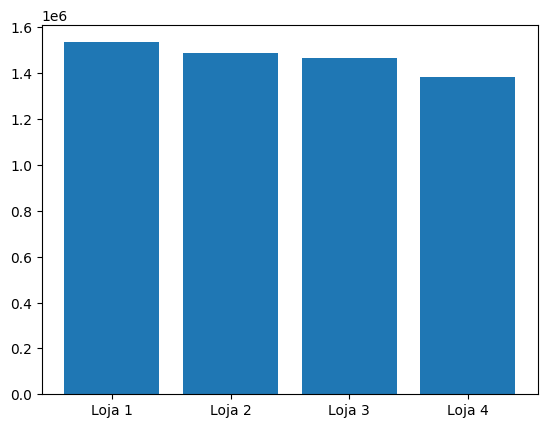

In [28]:
plt.bar(x=lojas[0], height=lojas[1] )
plt.show()

# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
